In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from src.data_loader import load_credit_default_dataset
from src.qboost_model import QBoostClassifier
from src.benchmark import  evaluate_model
import seaborn as sns

In [3]:
X_train, X_test, y_train, y_test = load_credit_default_dataset()


In [4]:
models = [
    ("QBoost", QBoostClassifier(n_classifiers=10, regularization=0.0001, max_depth=2, reps=1, maxiter=50)),
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Random Forest", RandomForestClassifier(n_estimators=100)),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100))
]

In [5]:
results = {}

In [6]:
for name, model in models:
    y_true, y_pred = evaluate_model(name, model, X_train, y_train, X_test, y_test)
    results[name] = (y_true, y_pred)

Q type: <class 'numpy.ndarray'>
Q shape: (10, 10)
Rozwiązuję QUBO...
QUBO size: 10

📊 QBoost
  Accuracy : 0.2212
  F1 Score : 0.3623
  Precision: 0.2212
  Recall   : 1.0000

📊 Logistic Regression
  Accuracy : 0.8083
  F1 Score : 0.3527
  Precision: 0.6973
  Recall   : 0.2361

📊 Random Forest
  Accuracy : 0.8137
  F1 Score : 0.4640
  Precision: 0.6380
  Recall   : 0.3646

📊 Gradient Boosting
  Accuracy : 0.8180
  F1 Score : 0.4658
  Precision: 0.6642
  Recall   : 0.3586


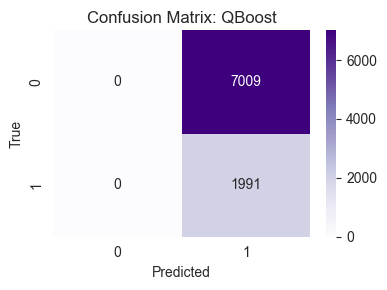

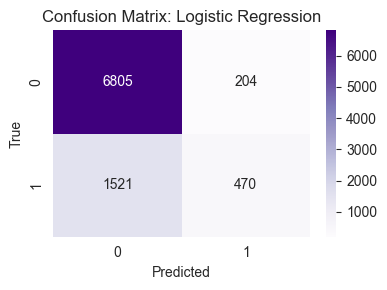

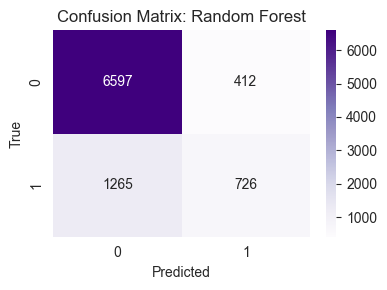

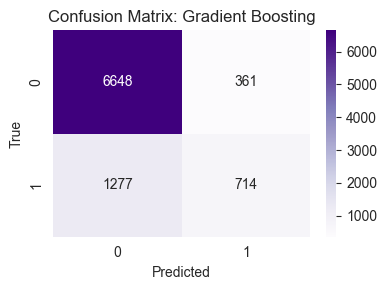

In [7]:
for name, (y_true, y_pred) in results.items():
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()